# Workshop 5: Pandas

In [5]:
import pandas as pd
uri = "D:\Coding\Python\Data_Science_And_ML\Pivot Table\sale_quarterly1.xlsx"
cols = "b:e"
df = pd.read_excel(uri, sheet_name="Sheet1", usecols=cols, header=2)
df.head()

,Employee,Sales,Quarter,Country
0,ณิแนน,1000,1,US
1,กอบเกียรติ,300,1,ญี่ปุ่น
2,Tina,400,1,ไทย
3,Maria,500,1,UK
4,Bill,800,1,US


In [ ]:
df.shape #20 แถว 4 คอลัม

(20, 4)

In [9]:
df.dtypes

Employee    object
Sales        int64
Quarter      int64
Country     object
dtype: object

In [10]:
df.describe()

,Sales,Quarter
count,20.000000,20.000000
mean,570.500000,2.500000
std,349.186649,1.147079
min,50.000000,1.000000
25%,287.500000,1.750000
50%,600.000000,2.500000
75%,900.000000,3.250000
max,1000.000000,4.000000


In [8]:
import pandas as pd
uri = "D:\Coding\Python\Data_Science_And_ML\Pivot Table\sale_quarterly1.xlsx"
cols = "b:e"
df = pd.read_excel(uri, sheet_name="Sheet1", usecols=cols, header=2, dtype={"Quarter":str})
df.describe()

,Sales
count,20.000000
mean,570.500000
std,349.186649
min,50.000000
25%,287.500000
50%,600.000000
75%,900.000000
max,1000.000000


In [12]:
df.Quarter = df.Quarter.astype("category")
df.dtypes

Employee      object
Sales          int64
Quarter     category
Country       object
dtype: object

In [ ]:
df.mean(numeric_only=True)

Sales    570.5
dtype: float64

In [18]:
df.std(numeric_only=True)

Sales    349.186649
dtype: float64

In [19]:
df.max(numeric_only=True)

Sales    1000
dtype: int64

In [20]:
df.min(numeric_only=True)

Sales    50
dtype: int64

In [21]:
df.Sales.sum()

11410

In [23]:
df.sum(numeric_only=True)

Sales    11410
dtype: int64

# Workshop 6: Pivot Table หาค่าเฉลี่ยยอดขาย

In [27]:
print(df.dtypes)

Employee      object
Sales          int64
Quarter     category
Country       object
dtype: object


In [28]:
pvt = df.pivot_table(index="Quarter", values="Sales", aggfunc="mean")
pvt

C:\Users\ahmad\AppData\Local\Temp\ipykernel_23252\4118918328.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index="Quarter", values="Sales", aggfunc="mean")


,Sales
Quarter,
1,600.0
2,462.0
3,630.0
4,590.0


In [34]:
pvt = df.pivot_table(index="Quarter", values="Sales", aggfunc="mean", margins=True)
pvt

C:\Users\ahmad\AppData\Local\Temp\ipykernel_23252\715691272.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df.pivot_table(index="Quarter", values="Sales", aggfunc="mean", margins=True)


,Sales
Quarter,
1,600.0
2,462.0
3,630.0
4,590.0
All,570.5


In [35]:
df.groupby("Quarter")["Sales"].mean()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_23252\314231896.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Quarter")["Sales"].mean()


Quarter
1    600.0
2    462.0
3    630.0
4    590.0
Name: Sales, dtype: float64

# Workshop 7: ค่าเฉลี่ยยอดขายแต่ละคนในแต่ละไตรมาส

In [17]:
pvt = df.pivot_table(index=["Quarter", "Employee"], values=["Sales"], margins=True, aggfunc="mean")
pvt

Sales
Quarter Employee          
1       Bill         800.0
        Maria        500.0
        Tina         400.0
        กอบเกียรติ   300.0
        ณิแนน       1000.0
2       Bill          60.0
        Maria         50.0
        Tina         700.0
        กอบเกียรติ   500.0
        ณิแนน       1000.0
3       Bill         300.0
        Maria        200.0
        Tina         750.0
        กอบเกียรติ   900.0
        ณิแนน       1000.0
4       Bill          50.0
        Maria        750.0
        Tina         250.0
        กอบเกียรติ   900.0
        ณิแนน       1000.0
All                  570.5

In [19]:
pvt = df.pivot_table(index=["Employee", "Quarter"], values=["Sales"], margins=True, aggfunc="mean")
pvt

Sales
Employee   Quarter        
Bill       1         800.0
           2          60.0
           3         300.0
           4          50.0
Maria      1         500.0
           2          50.0
           3         200.0
           4         750.0
Tina       1         400.0
           2         700.0
           3         750.0
           4         250.0
กอบเกียรติ 1         300.0
           2         500.0
           3         900.0
           4         900.0
ณิแนน      1        1000.0
           2        1000.0
           3        1000.0
           4        1000.0
All                  570.5

In [20]:
pvt = df.pivot_table(index=["Quarter", "Employee"], margins=True, aggfunc="sum")
pvt

C:\Users\ahmad\AppData\Local\Temp\ipykernel_11840\3843656667.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'USญี่ปุ่นไทยUKUSไทยญี่ปุ่นไทยUSUSUSญี่ปุ่นไทยUKไทยญี่ปุ่นญี่ปุ่นไทยUKUS' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  pvt = df.pivot_table(index=["Quarter", "Employee"], margins=True, aggfunc="sum")


Country  Sales
Quarter Employee                                                            
1       Bill                                                       US    800
        Maria                                                      UK    500
        Tina                                                      ไทย    400
        กอบเกียรติ                                            ญี่ปุ่น    300
        ณิแนน                                                      US   1000
2       Bill                                                       US     60
        Maria                                                      US     50
        Tina                                                      ไทย    700
        กอบเกียรติ                                            ญี่ปุ่น    500
        ณิแนน                                                     ไทย   1000
3       Bill                                                      ไทย    300
        Maria                                                      UK    200
        Tina                                                      ไทย    750
        กอบเกียรติ                                            ญี่ปุ่น    900
        ณิแนน                                                      US   1000
4       Bill                                                       US     50
        Maria                                                      UK    750
        Tina                                                      ไทย    250
        กอบเกียรติ                                            ญี่ปุ่น    900
        ณิแนน                                                 ญี่ปุ่น   1000
All                 USญี่ปุ่นไทยUKUSไทยญี่ปุ่นไทยUSUSUSญี่ปุ่นไทยU...  11410

In [18]:
pvt = df.pivot_table(index=["Employee", "Quarter"], margins=True, aggfunc="sum")
pvt

C:\Users\ahmad\AppData\Local\Temp\ipykernel_11840\220908998.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'USญี่ปุ่นไทยUKUSไทยญี่ปุ่นไทยUSUSUSญี่ปุ่นไทยUKไทยญี่ปุ่นญี่ปุ่นไทยUKUS' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  pvt = df.pivot_table(index=["Employee", "Quarter"], margins=True, aggfunc="sum")


Country  Sales
Employee   Quarter                                                          
Bill       1                                                       US    800
           2                                                       US     60
           3                                                      ไทย    300
           4                                                       US     50
Maria      1                                                       UK    500
           2                                                       US     50
           3                                                       UK    200
           4                                                       UK    750
Tina       1                                                      ไทย    400
           2                                                      ไทย    700
           3                                                      ไทย    750
           4                                                      ไทย    250
กอบเกียรติ 1                                                  ญี่ปุ่น    300
           2                                                  ญี่ปุ่น    500
           3                                                  ญี่ปุ่น    900
           4                                                  ญี่ปุ่น    900
ณิแนน      1                                                       US   1000
           2                                                      ไทย   1000
           3                                                       US   1000
           4                                                  ญี่ปุ่น   1000
All                 USญี่ปุ่นไทยUKUSไทยญี่ปุ่นไทยUSUSUSญี่ปุ่นไทยU...  11410

# Workshop 8: ยอดขายรวมแต่ละไตรมาส

In [21]:
pvt = df.pivot_table(index=["Quarter"], values="Sales", aggfunc="sum", margins=True)
pvt = pvt.applymap("{0:,}".format)
pvt

C:\Users\ahmad\AppData\Local\Temp\ipykernel_11840\3131869628.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvt = pvt.applymap("{0:,}".format)


,Sales
Quarter,
1,"3,000"
2,"2,310"
3,"3,150"
4,"2,950"
All,"11,410"


In [25]:
#สามารถ sum โดยใช้ numpy ได้
import numpy as np
pvt = df.pivot_table(index=["Quarter"], aggfunc=np.sum, margins=True)

# Apply formatting only to numeric columns
pvt_numeric = pvt.select_dtypes(include=["number"])  # Select numeric columns
pvt_numeric = pvt_numeric.style.format("${:,.2f}")  # Apply formatting to numeric data
pvt_numeric

C:\Users\ahmad\AppData\Local\Temp\ipykernel_11840\766867844.py:3: FutureWarning: The provided callable <function sum at 0x0000017B69106480> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pvt = df.pivot_table(index=["Quarter"], aggfunc=np.sum, margins=True)
C:\Users\ahmad\AppData\Local\Temp\ipykernel_11840\766867844.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'USญี่ปุ่นไทยUKUSไทยญี่ปุ่นไทยUSUSUSญี่ปุ่นไทยUKไทยญี่ปุ่นญี่ปุ่นไทยUKUS' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  pvt = df.pivot_table(index=["Quarter"], aggfunc=np.sum, margins=True)


,Sales
Quarter,
1,"$3,000.00"
2,"$2,310.00"
3,"$3,150.00"
4,"$2,950.00"
All,"$11,410.00"


# Workshop 9: ยอดขายรวม เฉลี่ย สูงสุดต่ำสุด แต่ละไตรมาส

In [29]:
pvt = df.pivot_table(index=["Quarter"], values=["Sales"], aggfunc=["sum", "max", "min", "mean"], margins=True)
pvt

,sum,max,min,mean
,Sales,Sales,Sales,Sales
Quarter,,,,
1,3000,1000,300,600.0
2,2310,1000,50,462.0
3,3150,1000,200,630.0
4,2950,1000,50,590.0
All,11410,1000,50,570.5


In [30]:
df["import"] = df["Sales"] - 50
df.head()

,Employee,Sales,Quarter,Country,import
0,ณิแนน,1000,1,US,950
1,กอบเกียรติ,300,1,ญี่ปุ่น,250
2,Tina,400,1,ไทย,350
3,Maria,500,1,UK,450
4,Bill,800,1,US,750


# Workshop 10: การเรียงข้อมูล

In [34]:
pvt = df.pivot_table(index=["Quarter"], values="Sales", aggfunc="sum")
pvt = pvt.applymap("{0:,}".format)

#pvt.sort_values("Sales") น้อยไปมาก
pvt = pvt.sort_values("Sales", ascending=False) #มากไปน้อย
pvt

C:\Users\ahmad\AppData\Local\Temp\ipykernel_11840\2555439654.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvt = pvt.applymap("{0:,}".format)


,Sales
Quarter,
3,"3,150"
1,"3,000"
4,"2,950"
2,"2,310"


# Workshop 11: การพล็อตกราฟ

<Axes: xlabel='Quarter'>

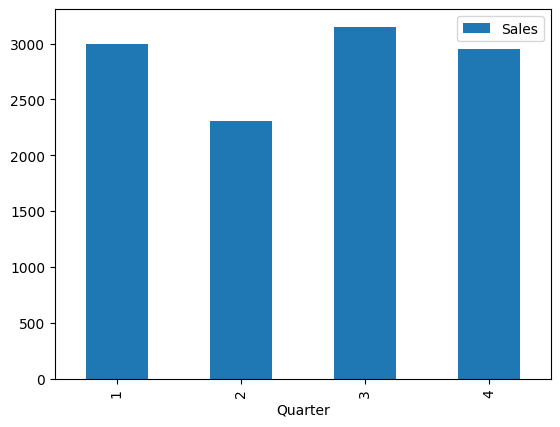

In [36]:
%matplotlib inline
pvt = df.pivot_table(index="Quarter", values="Sales", aggfunc='sum')
pvt.plot.bar()

<Axes: xlabel='Quarter'>

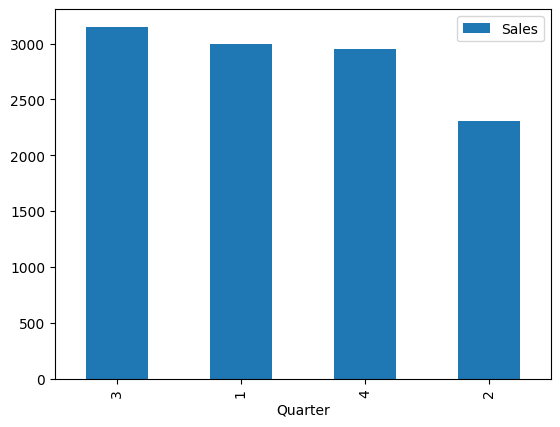

In [37]:
pvt_sorted = pvt.sort_values("Sales", ascending=False) #มากไปน้อย
pvt_sorted.plot.bar()

# Workshop 12: ยอดขายรวมของแต่ละคน

,Sales
Employee,
Bill,1210
Maria,1500
Tina,2100
กอบเกียรติ,2600
ณิแนน,4000


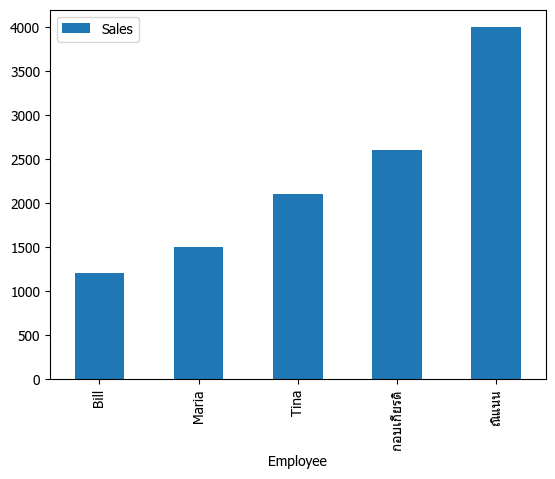

In [38]:
import matplotlib.pyplot as plt
plt.rc('font', family='tahoma')

pvt = df.pivot_table(index='Employee', values='Sales', aggfunc='sum')
pvt.plot.bar()
pvt

# Workshop 13: ยอดขายรวมแต่ละประเทศ

,Sales
Country,
UK,1450
US,2960
ญี่ปุ่น,3600
ไทย,3400


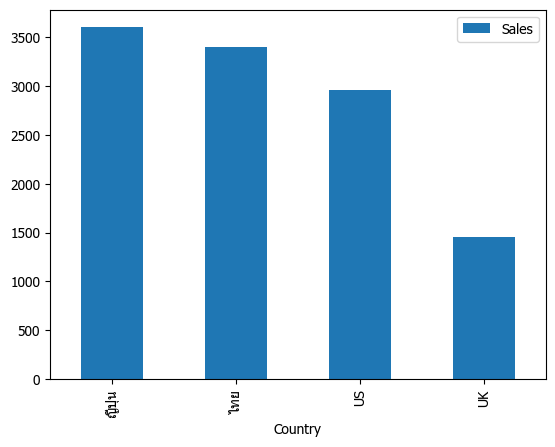

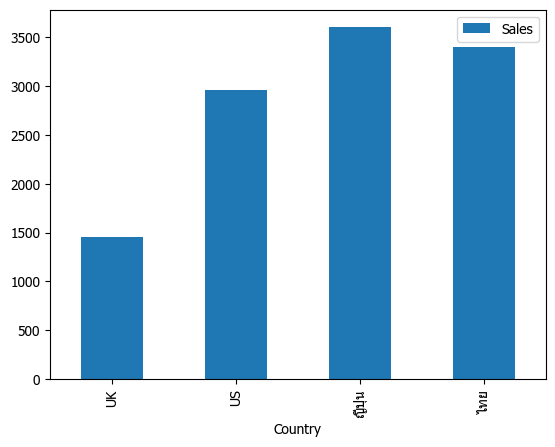

In [45]:
pvt = df.pivot_table(index='Country', values='Sales', aggfunc='sum')
pvt.sort_values("Sales",ascending=False).plot.bar()
pvt.plot.bar()
pvt

Sales
Country Quarter       
UK      1          500
        3          200
        4          750
US      1         1800
        2          110
        3         1000
        4           50
ญี่ปุ่น 1          300
        2          500
        3          900
        4         1900
ไทย     1          400
        2         1700
        3         1050
        4          250

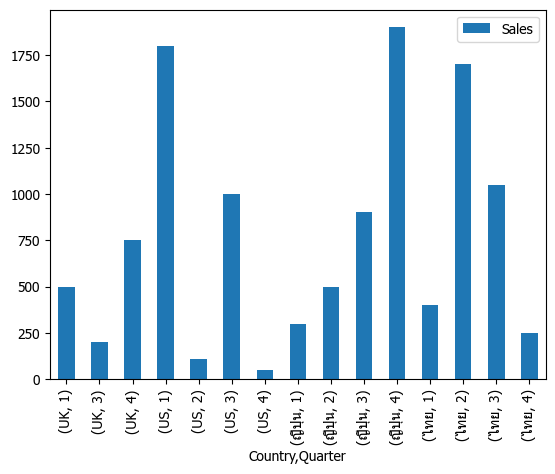

In [46]:
pvt = df.pivot_table(index=["Country", 'Quarter'], values="Sales", aggfunc='sum')
pvt.plot.bar()
pvt

# Workshop 14: ยอดขายแต่ละประเทศ แต่ละไตรมาส 2 มิติ

<Axes: xlabel='Country'>

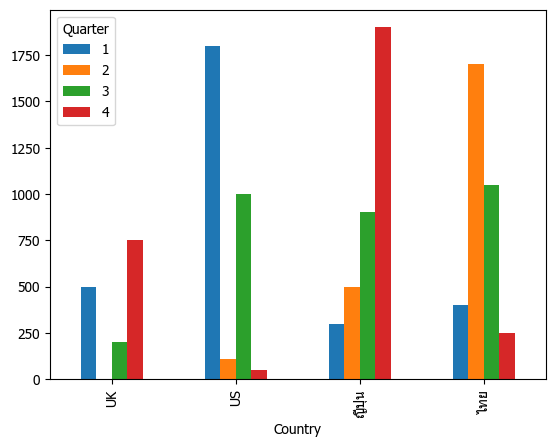

In [50]:
pvt2 = df.pivot_table(index="Country", columns="Quarter", values='Sales', aggfunc='sum', fill_value=0)
pvt2.plot.bar()

In [57]:
pvt = df.pivot_table(index="Country", columns="Quarter", values='Sales', aggfunc='sum', fill_value=0, margins=True)
pvt = pvt.applymap("{0:,}".format)
pvt

C:\Users\ahmad\AppData\Local\Temp\ipykernel_11840\1821181010.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvt = pvt.applymap("{0:,}".format)


Quarter,1,2,3,4,All
Country,,,,,
UK,500,0,200,750,"1,450"
US,"1,800",110,"1,000",50,"2,960"
ญี่ปุ่น,300,500,900,"1,900","3,600"
ไทย,400,"1,700","1,050",250,"3,400"
All,"3,000","2,310","3,150","2,950","11,410"


C:\Users\ahmad\AppData\Local\Temp\ipykernel_11840\266432334.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvt = pvt.applymap('{0:,}'.format)


Quarter,1,2,3,4,All
Country,,,,,
UK,500,0,200,750,"1,450"
US,"1,800",110,"1,000",50,"2,960"
ญี่ปุ่น,300,500,900,"1,900","3,600"
ไทย,400,"1,700","1,050",250,"3,400"
All,"3,000","2,310","3,150","2,950","11,410"


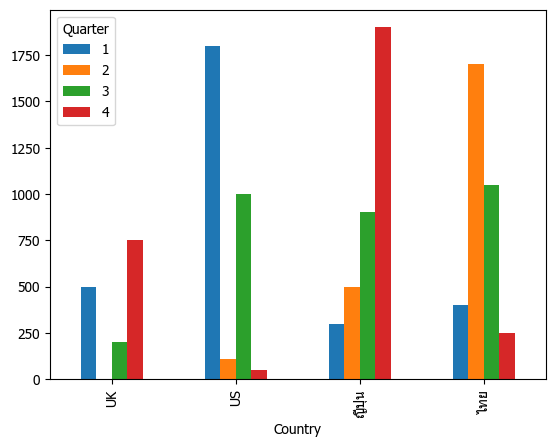

In [ ]:
pvt = df.pivot_table(index='Country', columns='Quarter', values='Sales', aggfunc='sum', fill_value=0, margins=True)

# Drop the "All" row and column
g = pvt.drop(index="All")  # Remove the row 'All'
g = g.drop(columns="All")  # Remove the column 'All'
g.plot.bar()

pvt = pvt.applymap('{0:,}'.format)
pvt

C:\Users\ahmad\AppData\Local\Temp\ipykernel_11840\1651737139.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvt = pvt.applymap("{0:,}".format)


Country,UK,US,ญี่ปุ่น,ไทย,All
Quarter,,,,,
1,500,"1,800",300,400,"3,000"
2,0,110,500,"1,700","2,310"
3,200,"1,000",900,"1,050","3,150"
4,750,50,"1,900",250,"2,950"
All,"1,450","2,960","3,600","3,400","11,410"


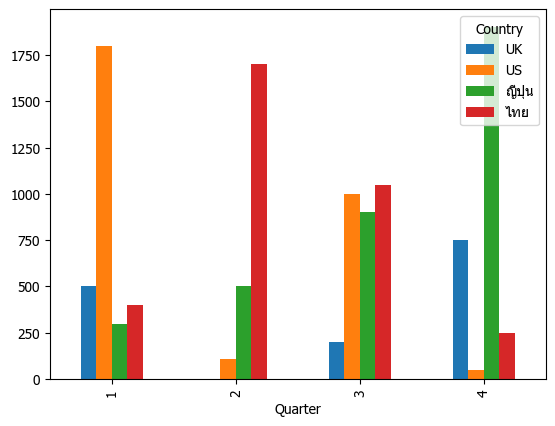

In [61]:
pvt2 = df.pivot_table(index="Quarter", columns="Country", values='Sales', aggfunc='sum', fill_value=0)
pvt2.plot.bar()

pvt = df.pivot_table(index="Quarter", columns="Country", values='Sales', aggfunc='sum', fill_value=0, margins=True)
pvt = pvt.applymap("{0:,}".format)
pvt

# Workshop 15: ยอดขายรวมแต่ละคนในแต่ละประเทศ

<Axes: xlabel='Country'>

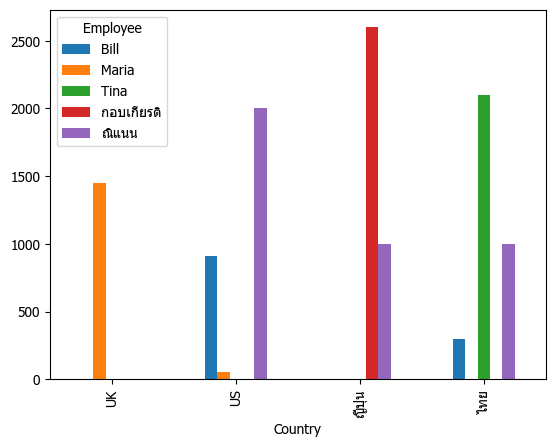

In [63]:
pvt2 = df.pivot_table(index="Country", columns="Employee", values='Sales', aggfunc='sum', fill_value=0)
pvt2.plot.bar()

In [64]:
pvt = df.pivot_table(index="Country", columns="Employee", values='Sales', aggfunc='sum', fill_value=0, margins=True)
pvt = pvt.applymap("{0:,}".format)
pvt

C:\Users\ahmad\AppData\Local\Temp\ipykernel_11840\3435186182.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvt = pvt.applymap("{0:,}".format)


Employee,Bill,Maria,Tina,กอบเกียรติ,ณิแนน,All
Country,,,,,,
UK,0,"1,450",0,0,0,"1,450"
US,910,50,0,0,"2,000","2,960"
ญี่ปุ่น,0,0,0,"2,600","1,000","3,600"
ไทย,300,0,"2,100",0,"1,000","3,400"
All,"1,210","1,500","2,100","2,600","4,000","11,410"


# Workshop 16: ยอดขายรวมแต่ละคนในแต่ละไตรมาส

C:\Users\ahmad\AppData\Local\Temp\ipykernel_11840\788526491.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvt = pvt.applymap("{0:,}".format)


Quarter,1,2,3,4,All
Employee,,,,,
Bill,800,60,300,50,"1,210"
Maria,500,50,200,750,"1,500"
Tina,400,700,750,250,"2,100"
กอบเกียรติ,300,500,900,900,"2,600"
ณิแนน,"1,000","1,000","1,000","1,000","4,000"
All,"3,000","2,310","3,150","2,950","11,410"


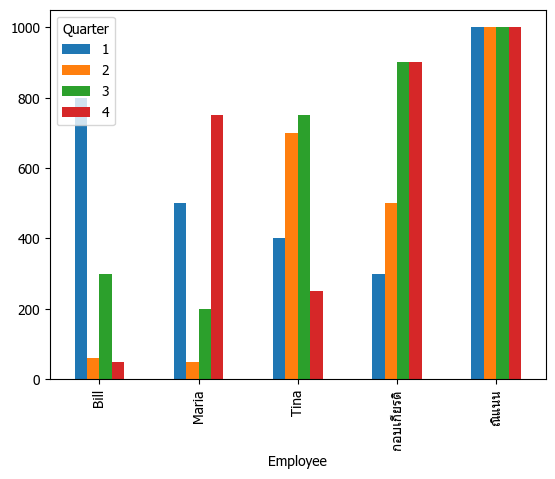

In [65]:
pvt2 = df.pivot_table(index="Employee", columns="Quarter", values='Sales', aggfunc='sum', fill_value=0)
pvt2.plot.bar()

pvt = df.pivot_table(index="Employee", columns="Quarter", values='Sales', aggfunc='sum', fill_value=0, margins=True)
pvt = pvt.applymap("{0:,}".format)
pvt

C:\Users\ahmad\AppData\Local\Temp\ipykernel_11840\3279817219.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvt = pvt.applymap("{0:,}".format)


Quarter,1,2,3,4,All
Country,,,,,
UK,1,0,1,1,3
US,2,2,1,1,6
ญี่ปุ่น,1,1,1,2,5
ไทย,1,2,2,1,6
All,5,5,5,5,20


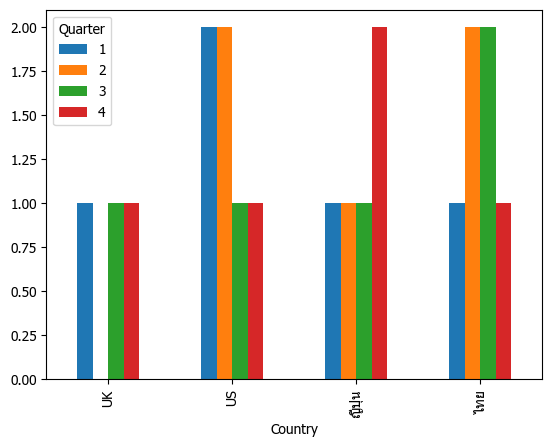

In [66]:
pvt2 = df.pivot_table(index="Country", columns="Quarter", values='Sales', aggfunc='count', fill_value=0)
pvt2.plot.bar()

pvt = df.pivot_table(index="Country", columns="Quarter", values='Sales', aggfunc='count', fill_value=0, margins=True)
pvt = pvt.applymap("{0:,}".format)
pvt

# Workshop 17: การกรอง Pivot Table

In [77]:
df

,Employee,Sales,Quarter,Country,import
0,ณิแนน,1000,1,US,950
1,กอบเกียรติ,300,1,ญี่ปุ่น,250
2,Tina,400,1,ไทย,350
3,Maria,500,1,UK,450
4,Bill,800,1,US,750
5,ณิแนน,1000,2,ไทย,950
6,กอบเกียรติ,500,2,ญี่ปุ่น,450
7,Tina,700,2,ไทย,650
8,Maria,50,2,US,0
9,Bill,60,2,US,10


In [78]:
pvt = df[df.Quarter == '3'].pivot_table(index='Country', columns="Quarter", values="Sales", aggfunc='sum')
pvt

Quarter,3
Country,
UK,200
US,1000
ญี่ปุ่น,900
ไทย,1050


In [80]:
pvt = df[(df.Quarter == '1') | (df.Quarter == '3')].pivot_table(index='Country', columns="Quarter", values="Sales", aggfunc='sum')
pvt

Quarter,1,3
Country,,
UK,500,200
US,1800,1000
ญี่ปุ่น,300,900
ไทย,400,1050


In [81]:
pvt = df[(df.Sales >= 300) & (df.Quarter == '3')].pivot_table(index='Country', columns="Quarter", values="Sales", aggfunc='sum')
pvt

Quarter,3
Country,
US,1000
ญี่ปุ่น,900
ไทย,1050


In [89]:
pvt = df[df.Country.str.match('U')].pivot_table(index='Country', columns="Quarter", values="Sales", aggfunc='sum', fill_value=666666)
pvt

Quarter,1,2,3,4
Country,,,,
UK,500,666666,200,750
US,1800,110,1000,50


In [84]:
pvt = df[df.Country == 'US'].pivot_table(index='Country', columns="Quarter", values="Sales", aggfunc='sum')
pvt

Quarter,1,2,3,4
Country,,,,
US,1800,110,1000,50


# Workshop 18: เปรียบเทียบผลงานของพนักงาน

<Axes: xlabel='Employee'>

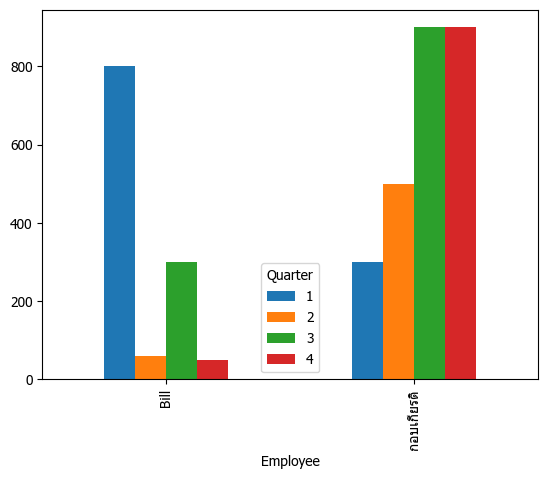

In [92]:
pvt2 = df[(df.Employee.str.match('กอบ')) |
          (df.Employee.str.match('Bill'))].pivot_table(
              index='Employee', columns="Quarter", values="Sales", fill_value=0,
              aggfunc='sum')
pvt2.plot.bar()

In [93]:
pvt = df[(df.Employee.str.match('กอบ')) |
          (df.Employee.str.match('Bill'))].pivot_table(
              index='Employee', columns="Quarter", values="Sales", fill_value=0,
              aggfunc='sum', margins=True)
pvt

Quarter,1,2,3,4,All
Employee,,,,,
Bill,800,60,300,50,1210
กอบเกียรติ,300,500,900,900,2600
All,1100,560,1200,950,3810


Quarter       1           2               3        4           All
Country      US ญี่ปุ่น  US ญี่ปุ่น ญี่ปุ่น  ไทย  US ญี่ปุ่น      
Employee                                                          
Bill        800       0  60       0       0  300  50       0  1210
กอบเกียรติ    0     300   0     500     900    0   0     900  2600
All         800     300  60     500     900  300  50     900  3810

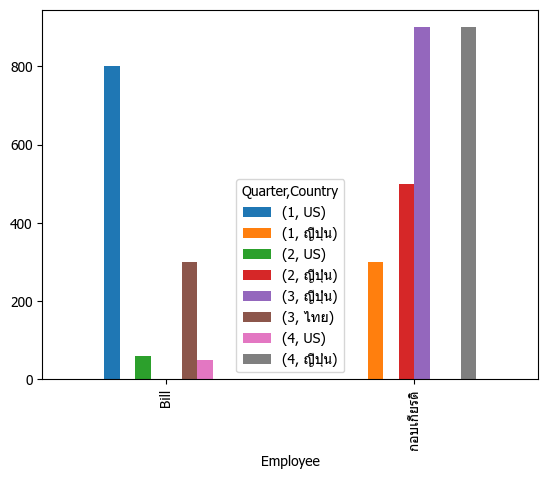

In [94]:
pvt2 = df[(df.Employee.str.match('กอบ')) |
          (df.Employee.str.match('Bill'))].pivot_table(
              index='Employee', columns=["Quarter", 'Country'], values="Sales", fill_value=0,
              aggfunc='sum')
pvt2.plot.bar()

pvt = df[(df.Employee.str.match('กอบ')) |
          (df.Employee.str.match('Bill'))].pivot_table(
              index='Employee', columns=["Quarter", 'Country'], values="Sales", fill_value=0,
              aggfunc='sum', margins=True)
pvt